# Machine Failure Detection

Import library.

In [127]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
sns.set()

Import dataset.

In [129]:
df = pd.read_csv('dataset/BearingVibration_Dataset.csv')
df.head()

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


Renaming column

In [130]:
columns = ['timestamp', 'bearing_1', 'bearing_2', 'bearing_3', 'bearing_4']
bearing_col = ['bearing_1', 'bearing_2', 'bearing_3', 'bearing_4']

df.columns = columns

df.head()

,timestamp,bearing_1,bearing_2,bearing_3,bearing_4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


Splitting timestamp

In [131]:
df['date'], df['time'] = df['timestamp'].str.split(' ').str

df.drop('timestamp', axis=1, inplace=True)
# df.drop('time', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bearing_1  982 non-null    float64
 1   bearing_2  982 non-null    float64
 2   bearing_3  982 non-null    float64
 3   bearing_4  982 non-null    float64
 4   date       982 non-null    object 
 5   time       982 non-null    object 
dtypes: float64(4), object(2)
memory usage: 46.2+ KB


C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


Check counts

In [132]:
columns = df.columns
df['date'].value_counts()

2004-02-17    144
2004-02-14    144
2004-02-13    144
2004-02-15    144
2004-02-18    144
2004-02-16    144
2004-02-12     79
2004-02-19     39
Name: date, dtype: int64

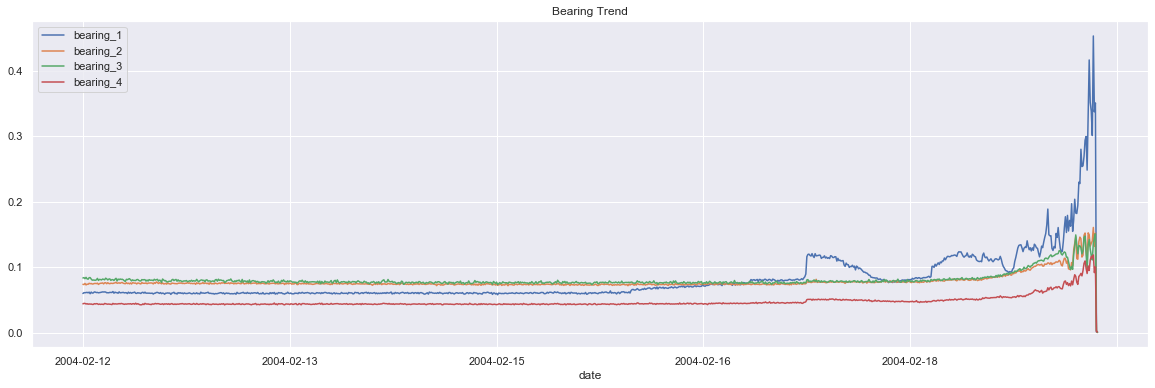

In [133]:
df.plot(kind='line', x='date', figsize=(20,6))
plt.title('Bearing Trend')
plt.show()

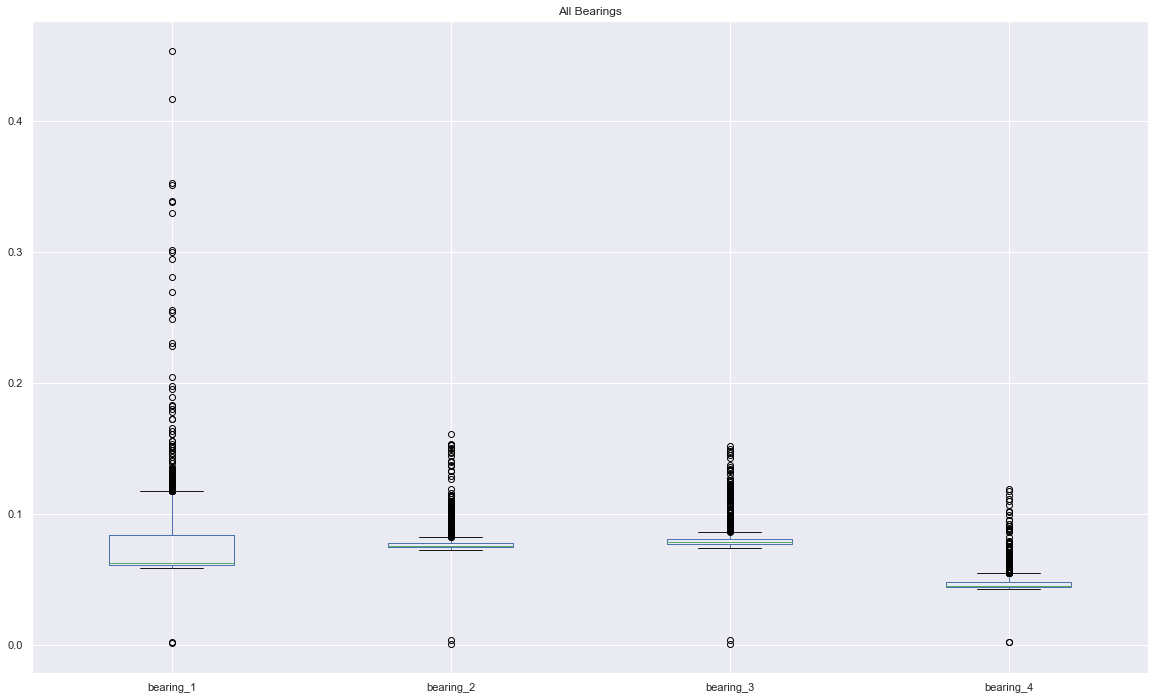

In [134]:
# fig = plt.figure()

# ax0 = fig.add_subplot(2, 2, 1)
# ax1 = fig.add_subplot(2, 2, 2)
# ax2 = fig.add_subplot(2, 2, 3)
# ax3 = fig.add_subplot(2, 2, 4)

# df['bearing_1'].plot(kind='box', color='red', ax=ax0, figsize=(20,12))
# ax0.set_title('Bearing 1')
# ax0.set_ylabel('Total')

# df['bearing_2'].plot(kind='box', color='blue', ax=ax1, figsize=(20,12))
# ax1.set_title('Bearing 2')
# ax1.set_ylabel('Total')

df.plot(kind='box', figsize=(20,12))
plt.title('All Bearings')

plt.show()

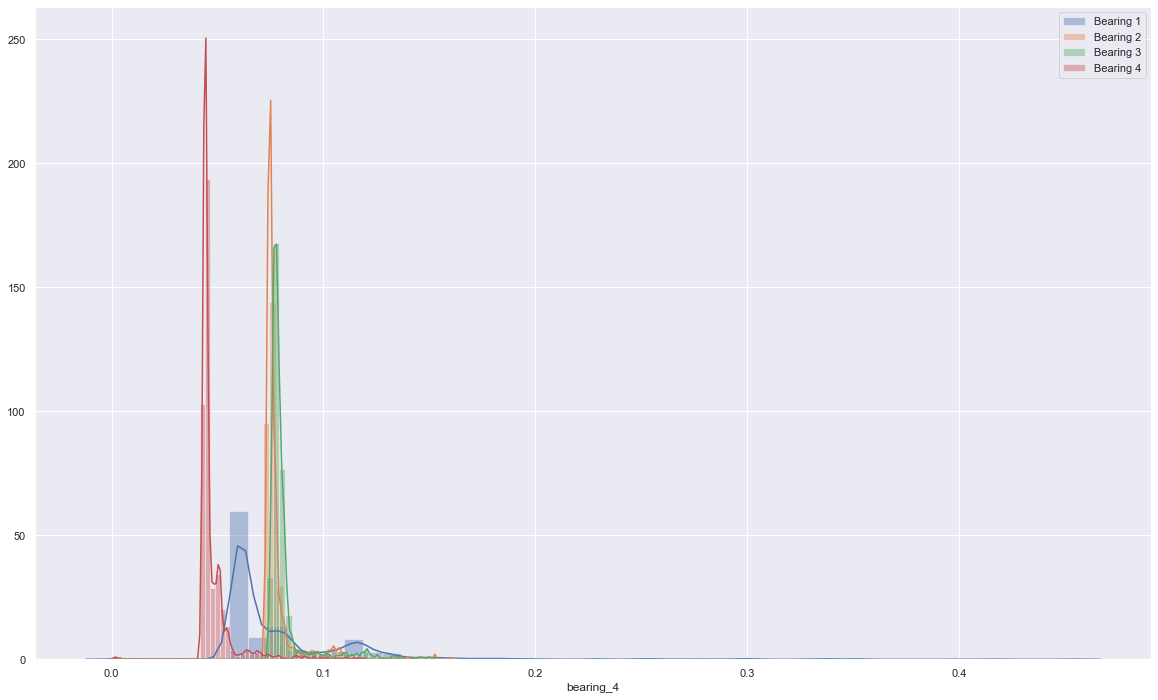

In [135]:
plt.figure(figsize=(20,12))

sns.distplot(df['bearing_1'], label='Bearing 1')
sns.distplot(df['bearing_2'], label='Bearing 2')
sns.distplot(df['bearing_3'], label='Bearing 3')
sns.distplot(df['bearing_4'], label='Bearing 4')

plt.legend()

## Data Preparation

Convert date and time datatypes

In [136]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_timedelta(df['time'])

df.head()

,bearing_1,bearing_2,bearing_3,bearing_4,date,time
0,0.060236,0.074227,0.083926,0.044443,2004-02-12,10:52:39
1,0.061455,0.073844,0.084457,0.045081,2004-02-12,11:02:39
2,0.061361,0.075609,0.082837,0.045118,2004-02-12,11:12:39
3,0.061665,0.073279,0.084879,0.044172,2004-02-12,11:22:39
4,0.061944,0.074593,0.082626,0.044659,2004-02-12,11:32:39


In [137]:
df.set_index(['date', 'time'], inplace=True)

df.head()

bearing_1  bearing_2  bearing_3  bearing_4
date       time                                                
2004-02-12 10:52:39   0.060236   0.074227   0.083926   0.044443
           11:02:39   0.061455   0.073844   0.084457   0.045081
           11:12:39   0.061361   0.075609   0.082837   0.045118
           11:22:39   0.061665   0.073279   0.084879   0.044172
           11:32:39   0.061944   0.074593   0.082626   0.044659

In [138]:
train_df = df.loc[:'2004-02-15']
train_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 511 entries, (Timestamp('2004-02-12 00:00:00'), Timedelta('0 days 10:52:39')) to (Timestamp('2004-02-15 00:00:00'), Timedelta('0 days 23:52:39'))
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bearing_1  511 non-null    float64
 1   bearing_2  511 non-null    float64
 2   bearing_3  511 non-null    float64
 3   bearing_4  511 non-null    float64
dtypes: float64(4)
memory usage: 18.8 KB


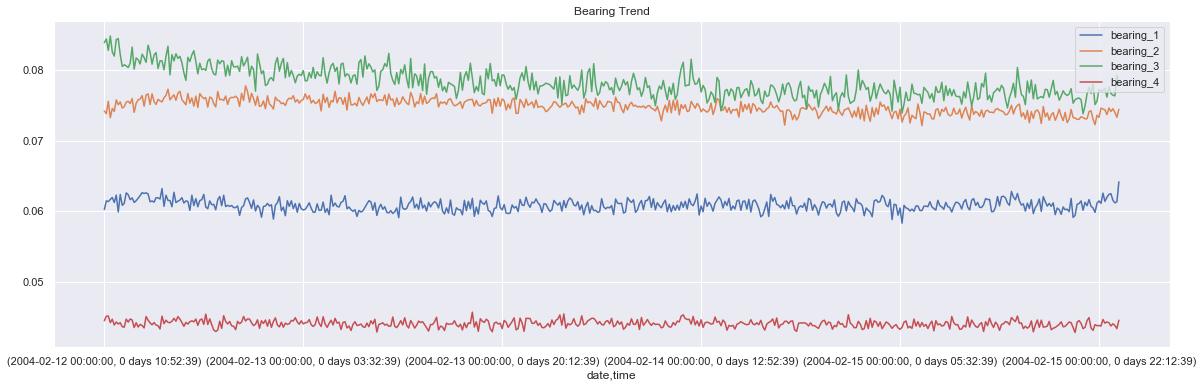

In [139]:
train_df.plot(kind='line', figsize=(20,6))
plt.title('Bearing Trend')
plt.show()

In [140]:
test_df = df.loc['2004-02-16':]
test_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 471 entries, (Timestamp('2004-02-16 00:00:00'), Timedelta('0 days 00:02:39')) to (Timestamp('2004-02-19 00:00:00'), Timedelta('0 days 06:22:39'))
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bearing_1  471 non-null    float64
 1   bearing_2  471 non-null    float64
 2   bearing_3  471 non-null    float64
 3   bearing_4  471 non-null    float64
dtypes: float64(4)
memory usage: 17.4 KB


## Algorithm 1: PCA + Normal Distribution 

In [141]:
from scipy.stats import multivariate_normal

0.02639243743587843

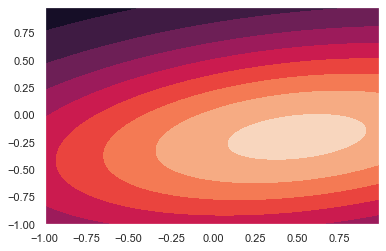

In [142]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
plt.contourf(x, y, rv.pdf(pos))
rv.pdf([-0.9, 0.7])

Import library.

In [143]:
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal

### Data Preparation

Apply PCA

In [144]:
pca = PCA(n_components=1)

train_pca_component = pca.fit_transform(train_df[['bearing_2', 'bearing_3', 'bearing_4']])
train_pca_df = pd.DataFrame(train_pca_component, columns=['bearing_pca'])

test_pca_component = pca.fit_transform(test_df[['bearing_2', 'bearing_3', 'bearing_4']])
test_pca_df = pd.DataFrame(test_pca_component, columns=['bearing_pca'])

test_pca_df.head()

,bearing_pca
0,0.013967
1,0.015036
2,0.013924
3,0.014925
4,0.013537


Join Dataframe

In [145]:
temp_df = train_df.reset_index()
train_pca_df = pd.concat([temp_df, train_pca_df], axis=1, sort=False)

temp_df = test_df.reset_index()
test_pca_df = pd.concat([temp_df, test_pca_df], axis=1, sort=False)

train_pca_df.head()

,date,time,bearing_1,bearing_2,bearing_3,bearing_4,bearing_pca
0,2004-02-12,10:52:39,0.060236,0.074227,0.083926,0.044443,0.005136
1,2004-02-12,11:02:39,0.061455,0.073844,0.084457,0.045081,0.005547
2,2004-02-12,11:12:39,0.061361,0.075609,0.082837,0.045118,0.004617
3,2004-02-12,11:22:39,0.061665,0.073279,0.084879,0.044172,0.005697
4,2004-02-12,11:32:39,0.061944,0.074593,0.082626,0.044659,0.004050


Drop column.

In [146]:
train_pca_df.drop(['date', 'time', 'bearing_2', 'bearing_3', 'bearing_4'], axis=1, inplace=True)
test_pca_df.drop(['date', 'time', 'bearing_2', 'bearing_3', 'bearing_4'], axis=1, inplace=True)

train_pca_df.head()

,bearing_1,bearing_pca
0,0.060236,0.005136
1,0.061455,0.005547
2,0.061361,0.004617
3,0.061665,0.005697
4,0.061944,0.004050


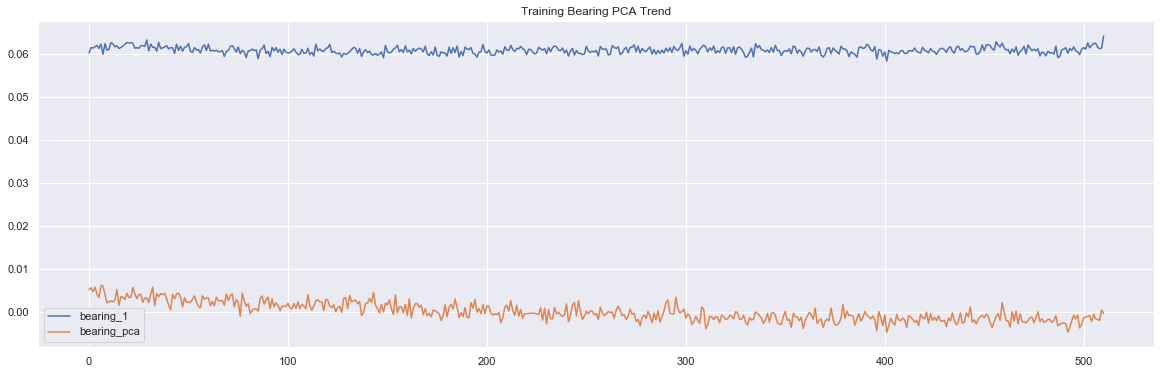

In [147]:
train_pca_df.plot(kind='line', figsize=(20,6))
plt.title('Training Bearing PCA Trend')
plt.show()

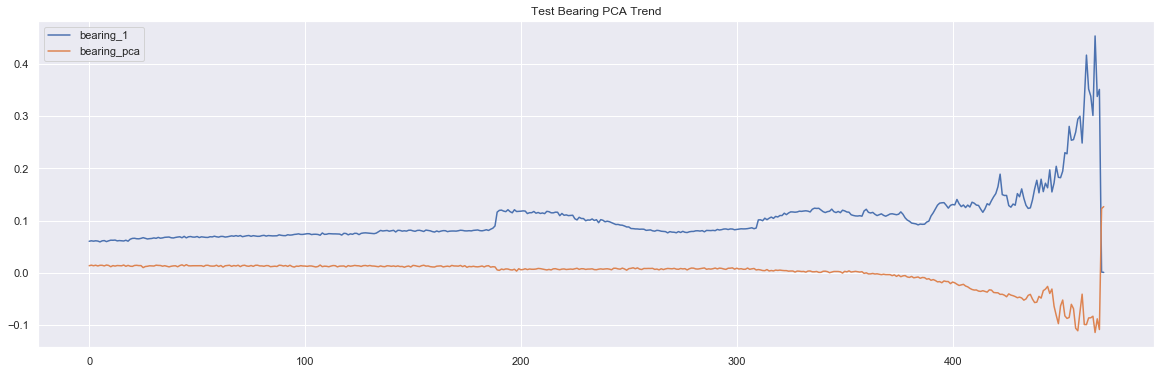

In [148]:
test_pca_df.plot(kind='line', figsize=(20,6))
plt.title('Test Bearing PCA Trend')
plt.show()

### Training 

In [149]:
means = train_pca_df.mean().to_list()
covs = train_pca_df.cov().values
covs

array([[6.49530477e-07, 4.86117542e-07],
       [4.86117542e-07, 4.57504248e-06]])

In [150]:
mn = multivariate_normal(means, covs)

Visualizing multivariate normal distribution space.

(10, 51)


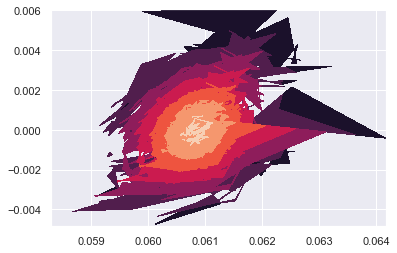

In [151]:
num_row = 10
num_col = int(len(train_pca_df['bearing_1'].values) / num_row)
num_drop = int(len(train_pca_df['bearing_1'].values) % num_row)
new_shape = (num_row, num_col)

vis_train_bearing_1 = train_pca_df.loc[num_drop:, 'bearing_1']
vis_train_bearing_1 = vis_train_bearing_1.to_numpy().reshape(new_shape)

vis_train_bearing_pca = train_pca_df.loc[num_drop:, 'bearing_pca']
vis_train_bearing_pca = vis_train_bearing_pca.to_numpy().reshape(new_shape)
print(vis_train_bearing_pca.shape)

space = np.empty(new_shape + (2,))
space[:, :, 0] = vis_train_bearing_1
space[:, :, 1] = vis_train_bearing_pca

plt.contourf(vis_train_bearing_1, vis_train_bearing_pca, mn.pdf(space))

### Evaluation

In [152]:
train_pca_df['predicted'] = train_pca_df.apply(lambda x: 1 if(mn.pdf(x) < 0.00001) else 0, axis=1)
test_pca_df['predicted'] = test_pca_df.apply(lambda x: 1 if(mn.pdf(x) < 0.00001) else 0, axis=1)

train_pca_df['actual'] = 0
test_pca_df['actual'] = 1

In [163]:
evaluation_pca_df = pd.concat([train_pca_df[['actual', 'predicted']], test_pca_df[['actual', 'predicted']]], 
                              axis=0, sort=False)
evaluation_pca_df.tail()

,actual,predicted
466,1,1
467,1,1
468,1,1
469,1,1
470,1,1


In [155]:
from sklearn.metrics import classification_report

In [164]:
print(classification_report(evaluation_pca_df['actual'], evaluation_pca_df['predicted']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       511
           1       1.00      0.98      0.99       471

    accuracy                           0.99       982
   macro avg       0.99      0.99      0.99       982
weighted avg       0.99      0.99      0.99       982



In [169]:
evaluation_pca_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 470
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   actual     982 non-null    int64
 1   predicted  982 non-null    int64
dtypes: int64(2)
memory usage: 23.0 KB


# 